## Теория графов. Поиск в глубину.  

### Определение.  
Dfs (depth first search, поиск в глубину) - один из способов обхода графа. Здесь и далее речь будет идти о работе с неориентированными графами.

### Реализация.   
Для реализации необходимо написать функцию **dfs(v, used)**, которая принимает вершину v и информацию о посещенных вершинах **used**, и обходит все ранее не посещенные вершины, до которых можно добраться из **v**. Для проверки того, была ли посещена вершина, достаточно завести массив **used**, в котором при каждом входе в очередную вершину отмечать соответствующее значение единичкой.

Таким образом, весь **dfs** может быть реализован следующим образом:

In [1]:
def dfs(v):
    used[v] = 1
    for to in g[v]:
        if not used[to]:
            dfs(to)

#### Задание №1.    
  Для графа на рисунке ниже (см. рис. 3), вручную определить какие из ребер будут образовывать ориентированное дерево, а какие вести в предка после вызова dfs(1). Учитывать, что вершины в списках смежности  𝑔[𝑣]  идут в порядке слева направо на рисунке (например  𝑔[3]=[7,10,6] ).

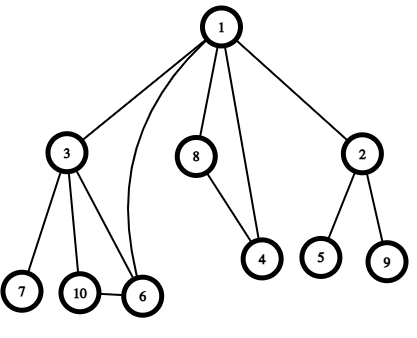

#### Решение №1.  
##### Список ребер, образующих ориентированное дерево:  
  
  $[1, 3], [3, 7], [3, 10], [10, 6], [1, 8], [8, 4], [1, 2], [2, 5], [2, 9]$  
    
##### Список рёбер, ведущих в предка после вызова  dfs(1):  
  
  $[6, 3], [6, 1], [4, 1]$

#### Задание №2.  
Реализовать функцию **dfs** и проверить на графе из рисунка 3, правильность типа каждого ребра после вызовы **dfs(1)**.

##### Описание графа.  

1. Зададим граф **g** з списком смежности.  
  
  $g = [[2, 5, 7, 3, 1], [0, 4, 8], [0, 6, 9, 5], [7, 0], [1], [9, 2, 0], [2], [0, 3], [1], [2, 5]]$


In [25]:
g = [[2, 5, 7, 3, 1], [0, 4, 8], [0, 6, 9, 5], [7, 0], [1], [9, 2, 0], [2], [0, 3], [1], [2, 5]]

2. Модернизируем наш dfs для поставленной задачи.

In [29]:
def dfs(v):
    used[v] = 1
    for to in g[v]:
        if not used[to]:
            type1.append((v, to))
            h[to] = h[v] + 1
            dfs(to)
        else:
            if h[to] + 1 < h[v]:
                type2.append((v, to))

In [30]:
def sm(x):
    return x[0] + 1, x[1] + 1

In [31]:
n = 10
used = [0] * n
type1 = []
type2 = []
h = [0] * n
dfs(0)
print(*map(sm, type1))
print(*map(sm, type2))



(1, 3) (3, 7) (3, 10) (10, 6) (1, 8) (8, 4) (1, 2) (2, 5) (2, 9)
(6, 3) (6, 1) (4, 1)


#### Задание  № 3. Получи дерево (informatics 182)

In [6]:
def dfs(v):
    used[v] = 1
    for to in g[v]:
        if not used[to]:
            type1.append((v + 1, to + 1))
            dfs(to)


n, m = map(int, input().split())
g = [[] for i in range(n)]
for i in range(m):
    a, b = map(int, input().split())
    g[a - 1].append(b - 1)
    g[b - 1].append(a - 1)

used = [0] * n
type1 = []
dfs(0)
for i in type1:
    print(*i)


4 4 
1 2 
2 3 
3 4 
4 1
1 2
2 3
3 4


#### Задание №4. Сдать задачу “Грядки”.

На площадке e-olymp:  
Лимит времени 1 секунда.  
Лимит использования памяти 128 MB.

Код, приведенный ниже, заходит на полный балл с глубиной стека рекурсии 35000.  
Минимальное/максимальнное время и минимальная/максимальная задействованная память на тестах 83,93 ms / 150,80 ms и	13 577 Kb / 30 560 Kb  соответственно.

In [ ]:
import sys
sys.setrecursionlimit(40000)


def dfs(x, y):
    a[x][y] = 1
    for dx, dy in zip((-1, 0, 0, 1), (0, -1, 1, 0)):
        X = x + dx
        Y = y + dy
        if 0 <= X < n and 0 <= Y < m:
            if a[X][Y] == '#':
                dfs(X, Y)


n, m = map(int, input().split())
a = []
for i in range(n):
    a.append(list(input()))

k = 0
for i in range(n):
    for j in range(m):
        if a[i][j] == '#':
            k += 1
            dfs(i, j)

print(k)


На acmp эта же задача, имея ограничения по памяти 16 Mb, ожидаемо получает RT на пятом тесте.

### Нахождение цикла в графе.  
$\,\,\,\,\,\,\,\,$Нетрудно заметить, что любое “пунктирное” ребро образует цикл вместе с ребрами дерева. Поэтому для нахождения цикла достаточно взять любое “пунктирное” ребро **v -> to**, и подниматься от вершины **v** к вершине **to** по предкам (**v = p[v])** до тех пор, пока не придем в вершину **to**.  
$\,\,\,\,\,\,\,\,$Важно помнить, что цикл может присутствовать только в какой-то одной из всех существующих компонент связности. Поэтому нужно вызывать процедуру **dfs** из всех непосещенных вершин, так же, как и при поиске компонент связности.
